In [156]:
import pandas as pd
import sklearn 
import numpy as np

In [157]:
data = pd.read_csv(r"C:\Users\user\surfdrive\Work\AnalyseMethoden\EScienceCenter\SamenUniek_simpel_AvD.csv")

In [158]:
data.describe()

,ChildID,ChildID.1,FamilyID,C3.3_SRS_TotalScore_18,EstimatedIQ,C3.3_Stop_Total_CorrectGO,C3.3_Stop_Total_CorrectNOGO,C3.3_Stop_Total_Mean_corGO_RT,CortexVol,SubCortGrayVol,TotalGrayVol,AgeYears,visit
count,392.000000,589.000000,589.000000,466.000000,587.000000,539.000000,539.000000,539.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,55665.020408,55961.770798,559.602716,4.506438,103.722317,95.790206,54.668062,750.754678,530331.777051,59454.217317,706835.430702,8.599745,1.668930
std,35446.655549,35116.328103,351.163375,3.565208,11.740891,4.360221,4.763511,159.648631,91343.543532,6625.543594,101474.614458,1.149304,0.944408
min,601.000000,601.000000,6.000000,0.000000,72.500000,62.500000,24.418605,453.889655,293370.103700,17664.000000,406051.103700,7.000000,1.000000
25%,22101.250000,24802.000000,248.000000,2.000000,95.000000,94.407895,52.083333,623.865772,477389.236500,55498.000000,641826.634600,7.500000,1.000000
50%,53501.500000,53502.000000,535.000000,4.000000,102.500000,96.710526,54.166667,736.503311,554103.223000,60008.000000,731663.351900,8.583333,1.000000
75%,88801.250000,88401.000000,884.000000,6.000000,112.500000,98.684211,58.333333,851.546667,594998.655200,64195.000000,777549.776700,9.333333,3.000000
max,117102.000000,117402.000000,1174.000000,17.000000,137.500000,100.000000,68.750000,1285.052632,734088.468900,75243.000000,936611.468900,11.666667,3.000000


Now we must define X(predictors i.e. brain measures) and y(dependent i.e. age)

In [160]:
# select predictors (X) you want to use. for now we include gender (which we do not want as predictor) but we need it for stratifying
X=data[['GenderTwin','CortexVol','SubCortGrayVol','TotalGrayVol']]

In [161]:
#needed for later in the script
X_withoutgender=X.drop('GenderTwin', axis = 1)


In [162]:
# To convert boys/girls to true/false
X['GenderTwin']=X['GenderTwin'] == 'boys'


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [163]:
y=data['AgeYears']

Now we split the data in train and test sets. We stratify this by Gender so the spread of boys/girls is similar in the train and test set.

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=X['GenderTwin'])

In [17]:
X_train

,GenderTwin,CortexVol,SubCortGrayVol,TotalGrayVol
330,False,474982.8999,58453,678229.8999
28,True,592553.5027,61470,768633.5027
386,False,559645.6791,64498,742540.6791
385,False,344616.4173,47997,498101.4173
246,False,543091.6591,55796,704478.6591
...,...,...,...,...
79,True,680128.2898,66903,901132.2898
179,False,358411.1561,49272,532263.1561
240,False,418252.9536,33500,525225.9536
270,False,618319.5370,62525,807959.5370


In [18]:
X_test

,GenderTwin,CortexVol,SubCortGrayVol,TotalGrayVol
181,False,545053.6339,58626,723528.6339
59,True,583587.9685,59597,761549.9685
213,False,434857.1004,47870,582450.1004
65,True,612605.8476,59934,786811.8476
151,True,627529.9931,59299,803147.9931
...,...,...,...,...
227,False,573138.3144,65709,737975.3144
175,True,559407.2032,60824,733283.2032
154,True,618131.8148,65649,815375.8148
382,False,527086.0002,56896,682727.0002


In [19]:
y_train


330     8.666667
28      8.250000
386     7.833333
385     9.000000
246     7.083333
         ...    
79      8.833333
179     7.583333
240     7.083333
270     7.000000
487    10.416667
Name: AgeYears, Length: 394, dtype: float64

In [20]:
y_test

181    7.833333
59     7.500000
213    7.416667
65     8.666667
151    8.083333
         ...   
227    7.000000
175    7.166667
154    7.750000
382    8.916667
190    7.166667
Name: AgeYears, Length: 195, dtype: float64

#Calculate baseline 'naive''prediction: simply predicting the average. A model would have to perform better than this! (we'll calculate each individual's error from this naive prediction: the difference between that person's age and the mean age)
I chose the average on the y_test set. That is 8.666239316287182 (see below)




# IMPORTANT NOTE: It is actually better to do this for the train set. I got confused because many tutorials compare models already in how well they predict the test set. But you should really compare these models and the different types of grid searches on the training set. And only use the final best model in the train set on the test set. (so in all analyses later below, predict the training set instead of the test set and only in the final final step predict the test set).

In [165]:
y_test.mean()

8.666239316287182

I simply want a list with the mean repeated 195 times (same length as test set)


In [166]:
y_test_averageonly = pd.Series(8.666239316287182) #make a series with only this number
y_test_averageonly = y_test_averageonly.repeat(195) #repeat this number 195 times


In [167]:
y_test_averageonly 

0    8.666239
0    8.666239
0    8.666239
0    8.666239
0    8.666239
       ...   
0    8.666239
0    8.666239
0    8.666239
0    8.666239
0    8.666239
Length: 195, dtype: float64

In [168]:
#index looks weird (only 0), therefore
y_test_averageonly.index=y_test.index

In [169]:
y_test_averageonly

181    8.666239
59     8.666239
213    8.666239
65     8.666239
151    8.666239
         ...   
227    8.666239
175    8.666239
154    8.666239
382    8.666239
190    8.666239
Length: 195, dtype: float64

In [170]:
# show performance metrics for this naive model using only the average as prediction
errors_naivemodel = abs(y_test_averageonly - y_test)
mape_naivemodel = 100 * np.mean(errors_naivemodel / y_test)
accuracy_naivemodel = 100 - mape_naivemodel
meanerror_naivemodel=np.mean(errors_naivemodel)
print('Model Performance')
print('Average Error: {:0.4f} years.'.format(np.mean(errors_naivemodel)))
print('Accuracy = {:0.2f}%.'.format(accuracy_naivemodel))
    

Model Performance
Average Error: 0.9321 years.
Accuracy = 89.12%.


So if we want a good model, it should be performing better than 89.12% accuracy........

Ok let's continue. Now we need to drop gender from all X datasets

In [171]:
X_train = X_train.drop('GenderTwin', axis = 1)


In [172]:
X_test = X_test.drop('GenderTwin', axis = 1)


# From here I started with a random forest regression

In [173]:
# this tutorial used 'features' for X and 'labels' for y (=actual values), I am too lazy to change everything so I redefine features and labels here
features=X_withoutgender
labels=y
train_labels=y_train
train_features=X_train
test_labels=y_test
test_features=X_test

In [174]:
features

,CortexVol,SubCortGrayVol,TotalGrayVol
0,496324.6342,56100,664132.6342
1,602906.4394,59727,791680.4394
2,601946.4372,64860,791047.4372
3,587914.1354,63776,775976.1354
4,444856.8913,52870,627151.8913
...,...,...,...
584,374663.9339,59549,546966.9339
585,441606.3079,54367,617691.3079
586,423582.3965,55870,607171.3965
587,480249.5412,52385,641543.5412


In [175]:
labels

0       7.416667
1       7.416667
2       7.250000
3       7.250000
4       7.666667
         ...    
584     9.250000
585     9.083333
586     9.083333
587    11.416667
588    11.416667
Name: AgeYears, Length: 589, dtype: float64

In [176]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


In [177]:
features

array([[496324.6342,  56100.    , 664132.6342],
       [602906.4394,  59727.    , 791680.4394],
       [601946.4372,  64860.    , 791047.4372],
       ...,
       [423582.3965,  55870.    , 607171.3965],
       [480249.5412,  52385.    , 641543.5412],
       [489857.8944,  52420.    , 651249.8944]])

Run random Forest - first without tuning

In [71]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees. This step is not really necessary it seems, but nice to get started.
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


The most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features). For now we will try adjusting the following set of hyperparameters:

    n_estimators = number of trees in the foreset
    max_features = max number of features considered for splitting a node
    max_depth = max number of levels in each decision tree
    min_samples_split = min number of data points placed in a node before the node is split
    min_samples_leaf = min number of data points allowed in a leaf node
    bootstrap = method for sampling data points (with or without replacement)

We will first use RandomizedSearchCV. We set a certain space of hyperparamaters to look in, and I think this function samples a random set of those settings to try out (see documentation for this functin)

In [72]:
from sklearn.model_selection import RandomizedSearchCV 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [73]:
# Create the random grid from the things we defined above
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


So above you see the parameters it will try out

In [74]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune (without any tuning)
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [75]:
# Fit the random forest using these parameters (from the random search model) on the training data set
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

In [76]:
#check which hyperparameter settings worked best in the random search
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [77]:
# so how well is this model with these parameters performing?
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features) #note that here you are making the predictions (y_pred as it is often called)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)

Model Performance
Average Error: 1.0553 degrees.
Accuracy = 87.86%.


87% seems like a good model, but (spoiler alert) just predicting the mean age results in a lower error (predicted-actual) than this. We'll calculate this 'baseline mean prediction' later

In [78]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

Model Performance
Average Error: 0.9924 degrees.
Accuracy = 88.56%.


In [79]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.79%.


Grid Search with Cross Validation

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search:

We'll built the next grid search surrounding the best values from the random search. The best values from the random search were:
{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [80]:
from sklearn.model_selection import GridSearchCV # Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': [2, 3], # I do not get this
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 700, 900, 1100]}

# Create a new model with these settings
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

This will try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance:

In [81]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [82]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 1100}

In [83]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 0.9994 degrees.
Accuracy = 88.47%.


In [84]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.69%.


It seems we have about maxed out performance, but we can give it one more try with a grid further refined from our previous results. Just try a different set of hyperparameters and repeat the same code. 

In [85]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 80],
    'max_features': [2, 3], # I do not get this
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200,400,500, 600]}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

grid_search_final.fit(train_features, train_labels);

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.2min finished


In [86]:
grid_search_final.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 2,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 100}

In [87]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, test_features, test_labels)

Model Performance
Average Error: 0.9882 degrees.
Accuracy = 88.62%.


In [88]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_final_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.87%.




A very slight improvement in accuracy means we have reached the point of diminishing returns from tuning. We will stop here and use this as our final model.
Final Model

The final model from hyperparameter tuning is as follows.


In [89]:
final_model = grid_search_final.best_estimator_

print('Final Model Parameters:\n')
print(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(final_model, test_features, test_labels)

Final Model Parameters:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 40, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 6, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Model Performance
Average Error: 0.9882 degrees.
Accuracy = 88.62%.



Comparison of All Improvement Techniques

Finally, we can make comparisons between the improvement techniques to determine which ones were most effective.
(the naive averageonly mode, the random search and the 2 grid searches)

In [90]:
#skipped part https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

In [91]:
#random search best model

In [92]:
import time # this is for calc time, we are defining something (evaluate_model) to figure out pros and cons of each model we tried with different hyperparameters

In [93]:
# Evaluate run time and prediction accuracy
def evaluate_model(model, x_train, y_train, x_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = x_train.shape[1]
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(x_train, y_train)
        predictions.append(model.predict(x_test))
    
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)
    
    # Calculate performance metrics
    errors = abs(predictions - y_test)
    mean_error = np.mean(errors)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    
    # Return results in a dictionary
    results = {'time': run_time, 'error': mean_error, 'accuracy': accuracy, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

In [96]:
#random search best model
random_results = evaluate_model(best_random, train_features, train_labels, test_features, test_labels)

In [97]:
random_results['model'] = 'best_random'

In [98]:
random_results

{'time': 1.182445216178894,
 'error': 0.9919729342891628,
 'accuracy': 88.5638336631811,
 'n_trees': 800,
 'n_features': 3,
 'model': 'best_random'}

In [99]:
# first grid search best model

In [100]:
first_grid_results = evaluate_model(best_grid, train_features, train_labels, test_features, test_labels)
first_grid_results['model'] = 'first_grid'

In [101]:
first_grid_results

{'time': 1.8846078157424926,
 'error': 0.9994827882365335,
 'accuracy': 88.47341240561087,
 'n_trees': 1100,
 'n_features': 3,
 'model': 'first_grid'}

In [102]:
#second grid search best model

In [103]:
final_model_results = evaluate_model(best_grid_final, train_features, train_labels, test_features, test_labels)
final_model_results['model'] = 'second_grid'

In [104]:
final_model_results

{'time': 0.17023799419403077,
 'error': 0.9882132822577351,
 'accuracy': 88.62312406412423,
 'n_trees': 100,
 'n_features': 3,
 'model': 'second_grid'}

In [106]:
# show performance metrics for this naive model using only the average as prediction
errors_naivemodel = abs(y_test_averageonly - y_test)
mape_naivemodel = 100 * np.mean(errors_naivemodel / y_test)
accuracy_naivemodel = 100 - mape_naivemodel
print('Model Performance')
print('Average Error: {:0.4f} years.'.format(np.mean(errors_naivemodel)))
print('Accuracy = {:0.2f}%.'.format(accuracy_naivemodel))
    

Model Performance
Average Error: 0.9321 years.
Accuracy = 89.12%.


In [107]:
#we also need to create some values for the naive average only model, otherwise we cannot show it in the comparison
baseline_results = {'model': 'average', 'time': np.nan, 'n_trees': np.nan, 'error': meanerror_naivemodel, 'accuracy': accuracy_naivemodel, 'n_features': 1}

Comparison of all models

In [108]:
comparison = {'model': [baseline_results['model'], random_results['model']],
              'accuracy': [round(baseline_results['accuracy'], 3), round(random_results['accuracy'], 3)],
              'error': [round(baseline_results['error'], 3), round(random_results['error'], 3)],
              'n_features': [baseline_results['n_features'], random_results['n_features']],
              'n_trees': [baseline_results['n_trees'], int(random_results['n_trees'])],
              'time': [round(baseline_results['time'], 4), round(random_results['time'], 4)]}
                        
for model in [first_grid_results, final_model_results]:
    comparison['accuracy'].append(round(model['accuracy'], 3))
    comparison['error'].append(round(model['error'], 3))
    comparison['model'].append(model['model'])
    comparison['n_features'].append(model['n_features'])
    comparison['n_trees'].append(int(model['n_trees']))
    comparison['time'].append(round(model['time'], 4))

In [109]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [110]:
comparison[['model', 'accuracy', 'error', 'n_features', 'n_trees', 'time']]

,model,accuracy,error,n_features,n_trees,time
0,average,89.120,0.932,1,NaN,NaN
1,best_random,88.564,0.992,3,800.0,1.1824
2,first_grid,88.473,0.999,3,1100.0,1.8846
3,second_grid,88.623,0.988,3,100.0,0.1702


In [111]:
#visualizing these different models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

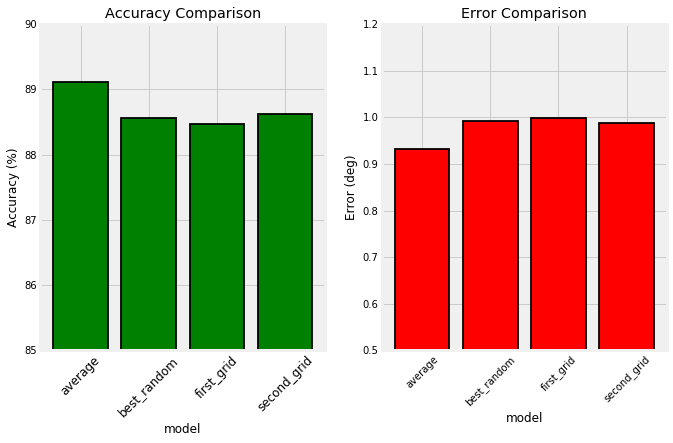

In [112]:
xvalues = list(range(len(comparison)))
plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 85, ymax = 90)
plt.xlabel('model'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['error'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 0.5, ymax = 1.2)
plt.xlabel('model'); plt.ylabel('Error (deg)'); plt.title('Error Comparison');
plt.show();

Ouch, the average is the best model. For now we'll ignore that and continue with the best tuned RandomForest model

Now we are going to finally fit the best model from all this tuning (grid_search_final) to the test set

In [135]:
#this was the best RF-model (repeated here because I got lost in the script)
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [2, 3],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)


In [136]:

grid_search_final.fit(train_features, train_labels) #hoe goed werkt het op de train data

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   10.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [

In [ ]:
#toepassen op test data

In [134]:
# Use the forest's predict method on the test data
predictions = grid_search_final.predict(test_features) 
#print(predictions)

In [139]:
grid_search_final

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [

In [121]:
errors = abs(predictions - test_labels) # Print out the mean absolute error (mae)
#print(errors)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'years.')

Mean Absolute Error: 0.99 years.


In [122]:
# calculate correlation between predicted and actual
from scipy.stats import pearsonr
corr = pearsonr(test_labels, predictions) [0]
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.012


In [123]:
#VISUALISEREN

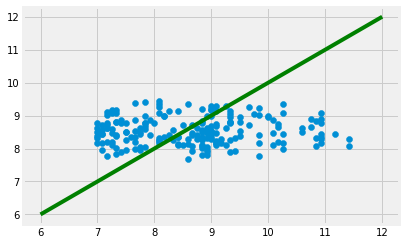

In [124]:
plt.scatter(test_labels, predictions)
plt.plot((6,12),(6,12),color='green')

# feature importance
More reading (seems biased method): https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
"biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables"

In [ ]:
grid_search_final # just to see which was the best model again

In [178]:
#Get numerical feature importances
importances = list(grid_search_final.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: CortexVol            Importance: 0.37
Variable: TotalGrayVol         Importance: 0.34
Variable: SubCortGrayVol       Importance: 0.29


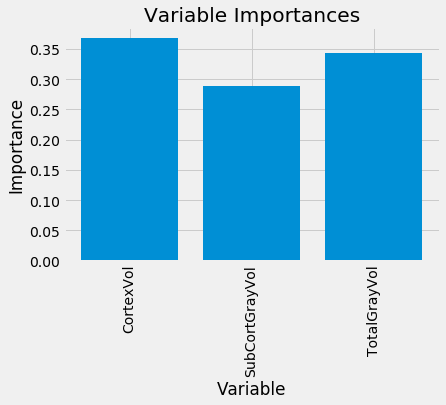

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [192]:
matplotlib

Using matplotlib backend: Qt5Agg


In [193]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [195]:
.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)

AttributeError: 'DataFrame' object has no attribute 'jointplot'

In [ ]:
#below I get errors

In [188]:
#pip install pydotplus


  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=2f2d5aeeff0db3642e70ebfc9ff1e472fb25738751f23cb8a6a9473f6f1c8258
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [190]:
from 

NameError: name 'graphviz' is not defined

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');